We want to create frequency stats based on one of the polish text.

Read file odm.txt which servers as a dictionary with all of the declination in polish language.

In [31]:
dictionary = dict()

for line in open('data/odm.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().split(',')]
    base_word = words[0]
    
    for word in words:
        dictionary[word] = base_word
    

Going through the text, find in the dictionary base_word for given element and add 1 to frequency_stats for this word. Additionally, punctuation is removed.

In [32]:
import string

frequency_stats = dict()

for line in open('data/potop.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().translate(str.maketrans('', '', string.punctuation)).split()]
    
    for word in words:
        if word in frequency_stats:
            frequency_stats[word] += 1
        else:
            frequency_stats[word] = 0

Write frequency_stats to stats.txt

In [33]:
with open('stats.txt', 'w+') as file:
    for word in sorted(frequency_stats, key=frequency_stats.get, reverse=True):
        file.write("{word}: {number_of_times}\n".format(word=word, number_of_times=frequency_stats[word]))

Create frequency plot

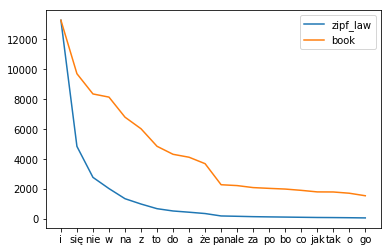

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

limit_words = 20

list_of_sorted_words = sorted(frequency_stats, key=frequency_stats.get, reverse=True)
list_of_frequencies = [frequency_stats[word] for word in list_of_sorted_words]

list_of_limited_sorted_words = sorted(frequency_stats, key=frequency_stats.get, reverse=True)[:limit_words]
list_of_limited_frequencies = [frequency_stats[word] for word in list_of_limited_sorted_words]

zipf_law = []

for index, frequency in enumerate(list_of_limited_frequencies):
    zipf_law.append(frequency/(index+1))
    
plt.plot(list_of_limited_sorted_words_, zipf_law)
plt.plot(list_of_limited_sorted_words_, list_of_limited_frequencies)
plt.legend(['zipf_law', 'book'], loc='upper right')

Calculate how many words are 'hapax legomena'. (Frequency is equal 1)

In [39]:
hapax_legomena = list_of_frequencies.count(1)

hapax_legomena

7429

Calculate cumulative frequency, how many words are needed to fulfill 50% of text.

In [44]:
how_many_words = sum(list_of_frequencies)
half_of_all_words = how_many_words / 2

how_many_words_needed = 0
while sum(list_of_frequencies[:how_many_words_needed]) < half_of_all_words:
    how_many_words_needed += 1
    
how_many_words_needed

199